<a href="https://colab.research.google.com/github/david1620301/senalesysistemas/blob/main/Taller_2_SyS_David_Cardenas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2. Transformada de Laplace**

**David Cardenas Garcia - 1054859849**

# Demuestre si los siguientes sistemas de la forma \( y = \mathcal{H}\{x\} \), son sistemas lineales e invariantes en el tiempo (SLIT). Simule los sistemas en Python:

---

**1.**

$$
y[n] = \frac{x[n]}{3} + 2x[n - 1] - y[n - 1]
$$

---

**2.**

$$
y[n] = \sum_{k=-\infty}^{n} x^2[k]
$$

---

**3.**

$$
y[n] = \text{median}(x[n])
$$

donde *median* es la función mediana sobre una ventana de tamaño 3.

---

**4.**

$$
y(t) = Ax(t) + B \quad \text{con } A, B \in \mathbb{R}
$$





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt

# Señal de prueba
N = 20
x = np.zeros(N)
x[5] = 1  # impulso en n=5

# Sistema 1
def sistema1(x):
    y = np.zeros_like(x)
    for n in range(1, len(x)):
        y[n] = x[n]/3 + 2*x[n-1] - y[n-1]
    return y

# Sistema 2
def sistema2(x):
    y = np.zeros_like(x)
    for n in range(len(x)):
        y[n] = np.sum(x[:n+1]**2)
    return y

# Sistema 3
def sistema3(x):
    return medfilt(x, kernel_size=3)

# Sistema 4
def sistema4(x, A=2, B=1):
    return A*x + B

# Simulación y gráficos
fig, axs = plt.subplots(4, 1, figsize=(10, 10))

# Sistema 1
y1 = sistema1(x)
axs[0].stem(y1)
axs[0].set_title('Sistema 1: y[n] = x[n]/3 + 2x[n-1] - y[n-1]')

# Sistema 2
y2 = sistema2(x)
axs[1].stem(y2)
axs[1].set_title('Sistema 2: y[n] = sum(x[k]^2)')

# Sistema 3
y3 = sistema3(x)
axs[2].stem(y3)
axs[2].set_title('Sistema 3: y[n] = mediana(x[n])')

# Sistema 4
t = np.linspace(0, 1, 100)
x4 = np.sin(2 * np.pi * 5 * t)
y4 = sistema4(x4, A=2, B=1)
axs[3].plot(t, y4)
axs[3].set_title('Sistema 4: y(t) = 2x(t) + 1')

plt.tight_layout()
plt.show()



## Análisis de Sistemas: Linealidad e Invariancia en el Tiempo (SLIT)

Se analizaron 4 sistemas para determinar si son lineales e invariantes en el tiempo (SLIT). A continuación se presentan las conclusiones:

| Sistema | Definición | ¿Lineal? | ¿Invariante en el tiempo? | ¿SLIT? |
|--------|------------|----------|----------------------------|--------|
| 1 | $$ y[n] = \frac{x[n]}{3} + 2x[n-1] - y[n-1] $$ | No (por retroalimentación) | Sí | No |
| 2 | $$ y[n] = \sum_{k=-\infty}^{n} x^2[k] $$ | No (no cumple superposición) | Sí | No |
| 3 | $$ y[n] = \text{median}(x[n]) $$ (ventana de 3) | No (mediana no es lineal) | Sí | No |
| 4 | $$ y(t) = Ax(t) + B,\;\; A,B \in \mathbb{R} $$ | Sí, solo si $$ B = 0 $$ | Sí | Sí / No |

**Nota:** El sistema 4 es SLIT únicamente si $$ B = 0 $$, ya que la suma con una constante rompe la propiedad de homogeneidad requerida para la linealidad.

Se simularon los sistemas en Python para observar su comportamiento ante señales de entrada simples.


# - Hallar la salida y[n] de un SLIT ante la entrada
  x[n] = {-15, 5, -3¹, 0, 5, 7, -1}, con respuesta al impulso
  h[n] = {1, -2, 0¹, 1, -2}, donde
  n ∈ {0, ±1, ±2, ..., ±N} y n = 0 para x[n]†.

  Nota: Utilizar método gráfico para encontrar la salida y comprobar con simulación en Python. Ver cuaderno Convolución discreta. Repita el proceso para el sistema con respuesta al escalón
  {-1, 6, -1.0, 3¹, 1, -10, 2, 5}
  (Ver cuaderno Respuesta Escalón).


Para sistemas lineales e invariantes en el tiempo (SLIT), la salida se calcula con la **convolución discreta**:

$$
y[n] = x[n] * h[n] = \sum_{k=-\infty}^{\infty} x[k] \cdot h[n - k]
$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Entrada x[n], con x[0] = -3 → corresponde a la posición 2
x = np.array([-15, 5, -3, 0, 5, 7, -1])
# Respuesta al impulso h[n], con h[0] = 0 → posición 2
h = np.array([1, -2, 0, 1, -2])

# Realizamos la convolución
y = np.convolve(x, h)

# Índices de la salida
n_x = np.arange(-2, 5)        # x[n] tiene longitud 7
n_h = np.arange(-2, 3)        # h[n] tiene longitud 5
n_y = np.arange(n_x[0] + n_h[0], n_x[-1] + n_h[-1] + 1)

# Gráfica
plt.stem(n_y, y)
plt.title('Salida y[n] = x[n] * h[n]')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.grid(True)
plt.show()

# También mostramos los valores numéricos
for n_val, y_val in zip(n_y, y):
    print(f"y[{n_val}] = {y_val}")


Ahora repetimos el proceso, pero con la siguiente secuencia:

**Nueva "respuesta al impulso":**

$$
h[n] = \{-1,\ 6,\ -1.0,\ 3,\ 1,\ -10,\ 2,\ 5\}
$$

donde el valor correspondiente a:

$$
h[0] = 3
$$

se encuentra en la **posición 3** del arreglo.

Usamos la misma señal de entrada \( x[n] \) que en el caso anterior.


In [ ]:
# Nueva h[n], con h[0] = 3 → posición 3
h2 = np.array([-1, 6, -1.0, 3, 1, -10, 2, 5])

# Convolución
y2 = np.convolve(x, h2)

# Índices
n_h2 = np.arange(-3, 5)
n_y2 = np.arange(n_x[0] + n_h2[0], n_x[-1] + n_h2[-1] + 1)

# Gráfica
plt.stem(n_y2, y2)
plt.title('Salida con nueva respuesta (tipo escalón)')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.grid(True)
plt.show()

# Mostrar valores
for n_val, y_val in zip(n_y2, y2):
    print(f"y[{n_val}] = {y_val}")


# - Sea la señal Gaussiana x(t) = e^(-a·t²) con a ∈ ℝ⁺, el sistema A con relación entrada-salida y_A(t) = x²(t), y el sistema lineal e invariante con el tiempo B con respuesta al impulso h_B(t) = B·e^(-b·t²):

  a) Encuentre la salida del sistema en serie x(t) → h_B(t) → y_A(t) → y(t).

  b) Encuentre la salida del sistema en serie x(t) → y_A(t) → h_B(t) → y(t).


## Resolución:

Dada la señal de entrada:

x(t) = e^(−a·t²), con a > 0

Y los sistemas:

- Sistema A: y_A(t) = x²(t)
- Sistema B: sistema LTI con respuesta al impulso h_B(t) = B·e^(−b·t²)

### a) Serie: x(t) → h_B(t) → y_A(t) → y(t)

1. Primero, el sistema B se aplica a x(t):  
   Como B es un sistema LTI, la salida será la convolución:

   y₁(t) = x(t) * h_B(t) = ∫ x(τ)·h_B(t−τ) dτ

   Sustituyendo:

   y₁(t) = ∫ e^(−a·τ²) · B·e^(−b·(t−τ)²) dτ  
         = B ∫ e^(−a·τ² − b·(t−τ)²) dτ  
   Esto da lugar a otra Gaussiana (resultado conocido de la convolución de dos gaussianas).

2. Luego, esa salida pasa por A, que eleva al cuadrado:

   y(t) = [y₁(t)]²

### b) Serie: x(t) → y_A(t) → h_B(t) → y(t)

1. Primero, el sistema A eleva al cuadrado:

   y_A(t) = x²(t) = [e^(−a·t²)]² = e^(−2a·t²)

2. Luego, esta señal pasa por B, un sistema LTI:

   y(t) = y_A(t) * h_B(t) = ∫ e^(−2a·τ²) · B·e^(−b·(t−τ)²) dτ  
       = B ∫ e^(−2a·τ² − b·(t−τ)²) dτ

   De nuevo, el resultado es una función Gaussiana.

### Conclusión:

Ambos caminos implican convolución entre gaussianas (o funciones tipo gaussiana), pero **el orden afecta el resultado final**. En (a), primero se convoluciona y luego se eleva al cuadrado, mientras que en (b), se eleva al cuadrado y luego se convoluciona. Esto produce salidas diferentes.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# Parámetros
a = 1.0   # parámetro de la gaussiana x(t)
b = 0.5   # parámetro del sistema B
B = 1.0   # ganancia del sistema B

# Tiempo continuo simulado (simulación discreta)
t = np.linspace(-5, 5, 1000)
dt = t[1] - t[0]

# Señal de entrada x(t)
x = np.exp(-a * t**2)

# Sistema A: salida y_A(t) = x(t)^2
y_A_directa = x**2

# Sistema B: respuesta al impulso h_B(t)
h_B = B * np.exp(-b * t**2)

# a) x(t) → h_B(t) → y_A(t)
conv1 = convolve(x, h_B, mode='same') * dt
y_a = conv1**2

# b) x(t) → y_A(t) → h_B(t)
conv2 = convolve(y_A_directa, h_B, mode='same') * dt
y_b = conv2

# Gráficas
plt.figure(figsize=(12, 6))
plt.plot(t, y_a, label='a) x → h_B → A (convolución luego cuadrado)')
plt.plot(t, y_b, label='b) x → A → h_B (cuadrado luego convolución)', linestyle='--')
plt.title('Comparación de salidas: dos composiciones de sistemas A y B')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Ejercicio: Definición de la Transformada de Laplace

- Obtenga **X(s)** junto con su **ROC** (Región de Convergencia) a partir de la gráfica anterior de polos y ceros.


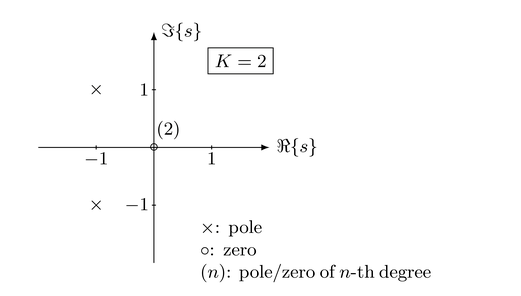

### Resolución del ejercicio: Obtener X(s) y su ROC

A partir de la gráfica de polos y ceros:

- Cero doble en s = 0
- Polos simples en s = j y s = –j
- Constante de ganancia K = 2

Entonces, la transformada de Laplace de la señal es:

$$
X(s) = \frac{2s^2}{s^2 + 1}
$$

**Región de Convergencia (ROC):**

No se indica causalidad, por lo tanto se asume que la señal es bilateral:

$$
\text{ROC: } \mathbb{C} \setminus \{s = \pm j\}
$$



### Ejercicio

- Determinar los polos y ceros de la transformada de Laplace \( \mathcal{L}\{e(t) \cdot \sin(\omega_0 t)\} \) mediante el cálculo manual y extendiendo el ejemplo anterior.

- ¿Qué simetría muestran los polos y los ceros en el plano \( s \)?


### Resolución del ejercicio

Dada la señal:

$$
x(t) = e(t) \cdot \sin(\omega_0 t)
$$

Su transformada de Laplace es:

$$
X(s) = \frac{\omega_0}{s^2 + \omega_0^2}
$$

**Polos:**
- \( s = +j\omega_0 \)
- \( s = -j\omega_0 \)

**Ceros:**
- No hay ceros (el numerador es constante)

**Simetría en el plano \( s \):**
- Los polos son complejos conjugados, ubicados simétricamente respecto al eje real.


In [ ]:
# Parte 1: Cálculo simbólico con SymPy
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np

# Inicializar impresión bonita
sym.init_printing()

# Definir variables
t, omega0 = sym.symbols('t omega0', real=True, positive=True)
s = sym.symbols('s', complex=True)

# Señal: sin(omega0 * t)
x = sym.sin(omega0 * t)

# Transformada de Laplace
X, cond, ROC = sym.laplace_transform(x, t, s)

print("Transformada de Laplace X(s):")
display(X)

print("Condición de convergencia:")
display(cond)

print("Región de convergencia:")
display(ROC)

# Parte 2: Graficar los polos en el plano s

# Valor numérico para ω₀
omega_val = 3  # puedes cambiarlo

# Polos: raíces de s² + ω₀² = 0 ⇒ s = ±jω₀
poles = [1j * omega_val, -1j * omega_val]
zeros = []  # no hay ceros

# Crear figura
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title("Plano s: Polos y Ceros de X(s)")

# Dibujar ejes
ax.axhline(0, color='gray', linestyle='--')
ax.axvline(0, color='gray', linestyle='--')

# Dibujar polos (X)
for p in poles:
    ax.plot(p.real, p.imag, 'rx', markersize=10, label='Polo' if 'Polo' not in ax.get_legend_handles_labels()[1] else "")

# Dibujar ceros (O) si hubiera
for z in zeros:
    ax.plot(z.real, z.imag, 'bo', markersize=10, label='Cero' if 'Cero' not in ax.get_legend_handles_labels()[1] else "")

# Configurar el gráfico
ax.set_xlabel('Re{s}')
ax.set_ylabel('Im{s}')
ax.grid(True)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.legend()
plt.show()


### Ejercicio

Demuestre las siguientes propiedades de la transformada de Laplace **sin utilizar tablas de propiedades**:

1. \( \mathcal{L}\{x(t - t_0)\} = e^{-s t_0} X(s) \)
2. \( \mathcal{L}\{x(at)\} = \frac{1}{|a|} X\left(\frac{s}{a}\right) \)
3. \( \mathcal{L}\left\{\frac{dx(t)}{dt}\right\} = sX(s) \)
4. \( \mathcal{L}\{x(t) * y(t)\} = X(s)Y(s) \)


### Demostración de propiedades de la transformada de Laplace (sin usar tablas)

---

#### 1. Desplazamiento en el tiempo

Queremos demostrar que:

$$
\mathcal{L}\{x(t - t_0)\} = e^{-s t_0} X(s)
$$

Partimos de la definición:

$$
\mathcal{L}\{x(t - t_0)\} = \int_0^{\infty} x(t - t_0) e^{-st} dt
$$

Cambio de variable: \( \tau = t - t_0 \Rightarrow t = \tau + t_0 \)

$$
= \int_{t_0}^{\infty} x(\tau) e^{-s(\tau + t_0)} d\tau = e^{-s t_0} \int_0^{\infty} x(\tau) e^{-s \tau} d\tau = e^{-s t_0} X(s)
$$

---

#### 2. Escalamiento en el tiempo

Queremos demostrar que:

$$
\mathcal{L}\{x(at)\} = \frac{1}{|a|} X\left( \frac{s}{a} \right)
$$

Usamos la definición:

$$
\mathcal{L}\{x(at)\} = \int_0^{\infty} x(at) e^{-st} dt
$$

Cambio de variable: \( \tau = at \Rightarrow dt = \frac{d\tau}{a} \)

$$
= \frac{1}{|a|} \int_0^{\infty} x(\tau) e^{- \frac{s}{a} \tau} d\tau = \frac{1}{|a|} X\left( \frac{s}{a} \right)
$$

---

#### 3. Derivación en el tiempo

Queremos demostrar que (con condición inicial nula):

$$
\mathcal{L}\left\{ \frac{dx(t)}{dt} \right\} = s X(s)
$$

Por definición:

$$
\int_0^{\infty} \frac{dx(t)}{dt} e^{-st} dt
$$

Integración por partes:

- \( u = e^{-st}, \quad dv = \frac{dx(t)}{dt} dt \)
- \( du = -s e^{-st} dt, \quad v = x(t) \)

Entonces:

$$
= x(t) e^{-st} \Big|_0^\infty + s \int_0^{\infty} x(t) e^{-st} dt
$$

Si \( x(t) \to 0 \) cuando \( t \to \infty \), el primer término es \( -x(0) \). Entonces:

$$
= -x(0) + s X(s)
$$

Y si \( x(0) = 0 \), queda:

$$
\mathcal{L}\left\{ \frac{dx(t)}{dt} \right\} = s X(s)
$$

---

#### 4. Convolución en el tiempo

Queremos demostrar:

$$
\mathcal{L}\{x(t) * y(t)\} = X(s) Y(s)
$$

Por definición de convolución:

$$
x(t) * y(t) = \int_0^t x(\tau) y(t - \tau) d\tau
$$

Aplicamos Laplace:

$$
\mathcal{L}\left\{ \int_0^t x(\tau) y(t - \tau) d\tau \right\} = \int_0^{\infty} \left[ \int_0^t x(\tau) y(t - \tau) d\tau \right] e^{-st} dt
$$

Intercambiando el orden de integración (por Fubini):

$$
= \int_0^{\infty} x(\tau) \left[ \int_\tau^{\infty} y(t - \tau) e^{-st} dt \right] d\tau
$$

Cambio de variable: \( \theta = t - \tau \Rightarrow dt = d\theta \)

$$
= \int_0^{\infty} x(\tau) e^{-s\tau} \left[ \int_0^{\infty} y(\theta) e^{-s\theta} d\theta \right] d\tau
= X(s) Y(s)
$$

Por lo tanto:

$$
\boxed{ \mathcal{L}\{x(t) * y(t)\} = X(s) \cdot Y(s) }
$$

